Task 3

Read Data

In [1]:
import pandas as pd 

df = pd.read_csv(r"C:\Users\user\Desktop\DataScience\DataSet\PQ Data.csv")

print(df.dtypes)
df.head(5)



Date                object
Customer Age         int64
Customer Gender     object
Country             object
State               object
Product Category    object
Sub Category        object
Quantity             int64
Unit Cost           object
Unit Price          object
dtype: object


,Date,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price
0,2/19/2016,29,F,United States,Washington,Accessories,Tires and Tubes,1,$80,$109
1,2/20/2016,29,F,United States,Washington,Clothing,Gloves,2,$25,$29
2,2/27/2016,29,F,United States,Washington,Accessories,Tires and Tubes,3,$4,$5
3,3/12/2016,29,F,United States,Washington,Accessories,Tires and Tubes,3,$88,$117
4,3/12/2016,29,F,United States,Washington,Accessories,Tires and Tubes,3,$35,$42


clean Data

In [2]:
df.isnull().sum()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34865 entries, 0 to 34864
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              34865 non-null  object
 1   Customer Age      34865 non-null  int64 
 2   Customer Gender   34865 non-null  object
 3   Country           34865 non-null  object
 4   State             34865 non-null  object
 5   Product Category  34865 non-null  object
 6   Sub Category      34865 non-null  object
 7   Quantity          34865 non-null  int64 
 8   Unit Cost         34865 non-null  object
 9   Unit Price        34865 non-null  object
dtypes: int64(2), object(8)
memory usage: 2.7+ MB


In [3]:

df["Unit Price"] = df["Unit Price"].str.replace("$","")
df["Unit Price"] = df["Unit Price"].str.replace(",","")
df["Unit Price"] = df["Unit Price"].astype("float")




col = ['Unit Price','Unit Cost']
df[col]=df[col].replace(r'\D','',regex=True).apply(pd.to_numeric)
df[["Unit Price","Unit Cost"]].head(4)

,Unit Price,Unit Cost
0,109.0,80
1,29.0,25
2,5.0,4
3,117.0,88


In [4]:
df[["Unit Price","Unit Cost"]].dtypes

Unit Price    float64
Unit Cost       int64
dtype: object

In [5]:
df.sample()

,Date,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price
12159,5/23/2016,24,M,Germany,Hamburg,Accessories,Helmets,3,210,333.0


In [6]:
#select numierc column on df 
numirc_col = df.select_dtypes(include="number")
#search negative number
neg = numirc_col<0
print(neg.sum())

Customer Age    0
Quantity        0
Unit Cost       0
Unit Price      0
dtype: int64


In [7]:
#search unexpected values
unexpected_values = numirc_col >1000000
print("unexpected values:",unexpected_values.sum())

unexpected values: Customer Age    0
Quantity        0
Unit Cost       0
Unit Price      0
dtype: int64


In [8]:
print("num of row duplicated:",df.duplicated().sum())
du =df[df.duplicated()]
du

num of row duplicated: 4


,Date,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price
18340,4/16/2016,18,M,France,Seine (Paris),Accessories,Tires and Tubes,2,12,18.0
28289,8/8/2015,30,F,United States,California,Accessories,Tires and Tubes,2,20,22.0
31095,12/13/2015,27,M,United States,California,Accessories,Bottles and Cages,3,18,19.0
33087,8/31/2015,33,F,Germany,Nordrhein-Westfalen,Accessories,Tires and Tubes,3,9,12.0


EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34865 entries, 0 to 34864
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              34865 non-null  object 
 1   Customer Age      34865 non-null  int64  
 2   Customer Gender   34865 non-null  object 
 3   Country           34865 non-null  object 
 4   State             34865 non-null  object 
 5   Product Category  34865 non-null  object 
 6   Sub Category      34865 non-null  object 
 7   Quantity          34865 non-null  int64  
 8   Unit Cost         34865 non-null  int64  
 9   Unit Price        34865 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 2.7+ MB


In [10]:
numirc_col.mean()

Customer Age     36.382705
Quantity          2.002553
Unit Cost       349.948860
Unit Price      389.325541
dtype: float64

In [11]:
numirc_col.min()

Customer Age    17.0
Quantity         1.0
Unit Cost        1.0
Unit Price       1.0
dtype: float64

In [12]:
numirc_col.max()

Customer Age      87.0
Quantity           3.0
Unit Cost       3240.0
Unit Price      5082.0
dtype: float64

In [13]:
numirc_col.describe()

,Customer Age,Quantity,Unit Cost,Unit Price
count,34865.000000,34865.000000,34865.000000,34865.000000
mean,36.382705,2.002553,349.948860,389.325541
std,11.113005,0.813965,490.010436,525.311617
min,17.000000,1.000000,1.000000,1.000000
25%,28.000000,1.000000,45.000000,54.000000
50%,35.000000,2.000000,150.000000,179.000000
75%,44.000000,3.000000,455.000000,521.000000
max,87.000000,3.000000,3240.000000,5082.000000


In [14]:
categor_col  = df.select_dtypes(exclude="number") 

categor_col.nunique()


Date                576
Customer Gender       2
Country               4
State                45
Product Category      3
Sub Category         17
dtype: int64

In [15]:
df.describe()

,Customer Age,Quantity,Unit Cost,Unit Price
count,34865.000000,34865.000000,34865.000000,34865.000000
mean,36.382705,2.002553,349.948860,389.325541
std,11.113005,0.813965,490.010436,525.311617
min,17.000000,1.000000,1.000000,1.000000
25%,28.000000,1.000000,45.000000,54.000000
50%,35.000000,2.000000,150.000000,179.000000
75%,44.000000,3.000000,455.000000,521.000000
max,87.000000,3.000000,3240.000000,5082.000000


In [16]:
df.value_counts()
df.select_dtypes("O").describe()

,Date,Customer Gender,Country,State,Product Category,Sub Category
count,34865,34865,34865,34865,34865,34865
unique,576,2,4,45,3,17
top,3/1/2016,M,United States,California,Accessories,Tires and Tubes
freq,196,17805,18076,10332,22533,11112


Feature Extraction

In [17]:
df["Date"]=pd.to_datetime(df["Date"])
print(df["Date"].head())
df["Year"]=df["Date"].dt.year
df["Day"]=df["Date"].dt.day
print("year :\n",df["Year"].head(3))
print("day :\n",df["Day"].head(3))

0   2016-02-19
1   2016-02-20
2   2016-02-27
3   2016-03-12
4   2016-03-12
Name: Date, dtype: datetime64[ns]
year :
 0    2016
1    2016
2    2016
Name: Year, dtype: int32
day :
 0    19
1    20
2    27
Name: Day, dtype: int32


In [18]:
df["total revenue"]= df['Quantity']*df['Unit Price']
df["total revenue"].sum()

22350360.0

In [19]:
df["total cost"]= df['Quantity']*df['Unit Cost']
df["total cost"].sum()

20086853

In [20]:
df["profit"]= df['total revenue']*df['total cost']
df["profit"]

0           8720.0
1           2900.0
2            180.0
3          92664.0
4          13230.0
           ...    
34860    3046863.0
34861    4575040.0
34862    3243567.0
34863    3448467.0
34864    3637760.0
Name: profit, Length: 34865, dtype: float64

In [21]:
df["classify profit"]= df["profit"].apply(lambda x: "positive" if x>0 else("negative" if x<0 else "break even"))
df["classify profit"] 

0        positive
1        positive
2        positive
3        positive
4        positive
           ...   
34860    positive
34861    positive
34862    positive
34863    positive
34864    positive
Name: classify profit, Length: 34865, dtype: object

In [22]:
df.sample()

,Date,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Year,Day,total revenue,total cost,profit,classify profit
23195,2016-03-14,24,M,United States,Washington,Bikes,Road Bikes,1,1120,1100.0,2016,14,1100.0,1120,1232000.0,positive


In [33]:
df["Category_Profit"]=df["profit"].apply(lambda x:"Postive" if x>0 else "Negative")
df.sample()

,Date,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Year,Day,total revenue,total cost,profit,classify profit,Month,Category_Profit
10101,2015-10-01,25,M,Germany,Nordrhein-Westfalen,Accessories,Bottles and Cages,1,75,95.0,2015,1,95.0,75,7125.0,positive,10,Postive


In [23]:
num_row = len(df)
print("num_row1: ",num_row)
num_row = df.shape[0]
print("num_row2: ",num_row)

num_row1:  34865
num_row2:  34865


In [24]:
avarege_cost = df["Unit Cost"].mean()
avarege_cost

349.94885988813996

In [25]:
hightsales_subcategroy= df.groupby('Sub Category')['Quantity'].sum()
hightsales_subcategroy.idxmax()

'Tires and Tubes'

In [26]:
df["profit"]= df['total revenue']*df['total cost']
hight_profit = df["profit"].max()
hight_profit

17726400.0

In [27]:
df.sample()

,Date,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Year,Day,total revenue,total cost,profit,classify profit
15926,2015-12-28,47,F,United Kingdom,England,Accessories,Tires and Tubes,3,22,26.0,2015,28,78.0,66,5148.0,positive


In [28]:
top_state = df.groupby("State")["total revenue"].sum()
top_state.idxmax()

'California'

In [29]:
seles_year = df.groupby("Year")["Quantity"].sum()
seles_year

Year
2015    30061
2016    39758
Name: Quantity, dtype: int64

In [30]:
order_category = df.groupby("Product Category")["Quantity"].sum()
order_category

Product Category
Accessories    45047
Bikes          14291
Clothing       10481
Name: Quantity, dtype: int64

In [31]:
df["Month"]=df["Date"].dt.month
top_profit_category =df.groupby(["Month","Product Category"])["profit"].sum().groupby("Month")
top_profit_category.idxmax()

Month
1      (1, Bikes)
2      (2, Bikes)
3      (3, Bikes)
4      (4, Bikes)
5      (5, Bikes)
6      (6, Bikes)
7      (7, Bikes)
8      (8, Bikes)
9      (9, Bikes)
10    (10, Bikes)
11    (11, Bikes)
12    (12, Bikes)
Name: profit, dtype: object

months have the highest sales:  6


<Axes: xlabel='Month'>

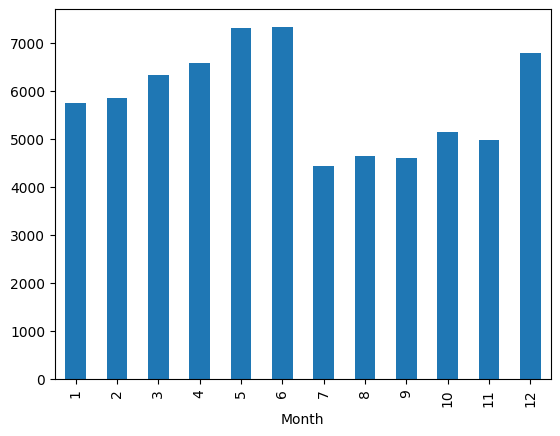

In [32]:
month_sales =df.groupby("Month")["Quantity"].sum()
print("months have the highest sales: ",month_sales.idxmax())
month_sales.plot(kind="bar")
